# Discrete Cosine Transform - Part 2

This section explores the DCT-2 and its application to image compression.

We begin with the cosine basis function.

$$DCT-2\ basis\ function:
\alpha cos[(n+\frac{1}{2})k \frac{\pi}{N}],\ \alpha=\begin{dcases}
\frac{1}{\sqrt{N}} &k = 0\\
\sqrt{\frac{2}{N}} &\ otherwise
\end{dcases}$$ 

$where \ n, \ k \ goes \ from \ 0...N-1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
N = 8
A = np.zeros((N,N))
for k in range(N):
    for n in range(N):
        A[k,n] = np.cos((n+0.5)*k*np.pi/N)

A

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
        -0.55557023, -0.83146961, -0.98078528],
       [ 0.92387953,  0.38268343, -0.38268343, -0.92387953, -0.92387953,
        -0.38268343,  0.38268343,  0.92387953],
       [ 0.83146961, -0.19509032, -0.98078528, -0.55557023,  0.55557023,
         0.98078528,  0.19509032, -0.83146961],
       [ 0.70710678, -0.70710678, -0.70710678,  0.70710678,  0.70710678,
        -0.70710678, -0.70710678,  0.70710678],
       [ 0.55557023, -0.98078528,  0.19509032,  0.83146961, -0.83146961,
        -0.19509032,  0.98078528, -0.55557023],
       [ 0.38268343, -0.92387953,  0.92387953, -0.38268343, -0.38268343,
         0.92387953, -0.92387953,  0.38268343],
       [ 0.19509032, -0.55557023,  0.83146961, -0.98078528,  0.98078528,
        -0.83146961,  0.55557023, -0.19509032]])

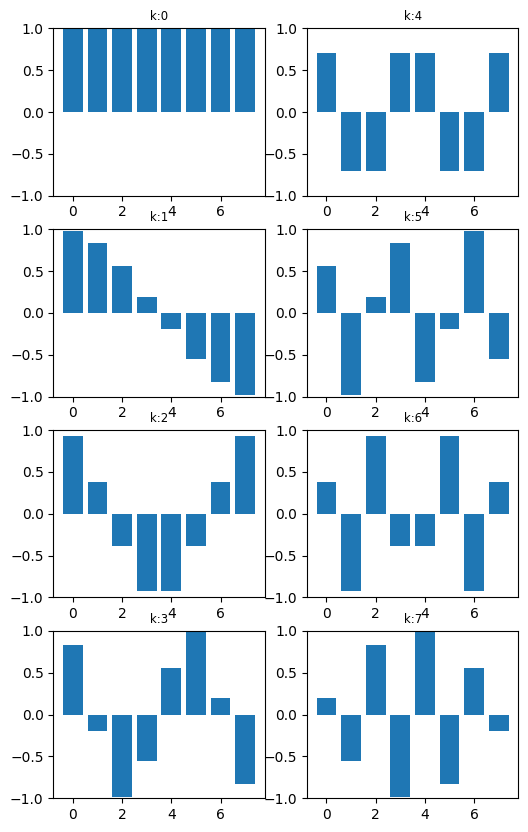

In [3]:
#Plotting cosine basis functions
fig, ax = plt.subplots(int(N/2),2,figsize=(6,10))
for k in range(N):
    ax[int(k%4),int(k//4)].bar(range(N),A[k,:])
    ax[int(k%4),int(k//4)].set_title("k:"+str(k),fontsize='small')
    ax[int(k%4),int(k//4)].set_ylim(-1,1)


We can see that the at $k=0$, we get a constant DC component. As we increase k, we get higher and higher frequency components in the form of oscillations.

In [4]:
np.round(np.matmul(A,A.T)) #orthogonal if 1st diagonal coefficent (k=0) is divided by 1/N, other diagonal 2/N 

array([[ 8.,  0., -0.,  0.,  0.,  0., -0., -0.],
       [ 0.,  4.,  0., -0.,  0., -0.,  0.,  0.],
       [-0.,  0.,  4.,  0., -0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  4.,  0.,  0., -0., -0.],
       [ 0.,  0., -0.,  0.,  4.,  0., -0., -0.],
       [ 0., -0.,  0.,  0.,  0.,  4.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0.,  4.,  0.],
       [-0.,  0.,  0., -0., -0., -0.,  0.,  4.]])

Taking the dot product of matrix A with itself shows that the cosine basis functions are orthogonal if the 1st diagonal coefficent is divided by 1/N and the other diagonal coefficients by 2/N. 

DCT-2: 
$$ X[k] = \alpha \sum_{n=0}^{N-1} x[n] cos[(n+\frac{1}{2})k \frac{\pi}{N}],\ \alpha=\begin{dcases}
\frac{1}{\sqrt{N}} &k = 0\\
\sqrt{\frac{2}{N}} &\ otherwise
\end{dcases}$$ 

$where \ n, \ k \ goes \ from \ 0...N-1$




DCT-3: 
$$ x[n] = \alpha \sum_{k=0}^{N-1} X[k]cos[(n+\frac{1}{2})k \frac{\pi}{N}],\ \alpha=\begin{dcases}
\frac{1}{\sqrt{N}} &n = 0\\
\sqrt{\frac{2}{N}} &\ otherwise
\end{dcases}$$ 

$where \ n, \ k \ goes \ from \ 0...N-1$

This is also the inverse DCT of DCT-2.

## 2-Dimensional DCT-2

Now that we have seen the 1-dimensional DCT-2, we can extend that to  2-dimensional. The 2D DCT-2 is has been used in applications such as image compression (jpeg). 

2D DCT-2:$$ X[k,l] = \alpha_{k} \alpha_{l} \sum_{m=0}^{M-1}\sum_{n=0}^{N-1} x[m,n] cos[(m+\frac{1}{2})k \frac{\pi}{M}]cos[(n+\frac{1}{2})l \frac{\pi}{N}],$$ 
$$\alpha_{k}=\begin{dcases}
\frac{1}{\sqrt{M}} &k = 0\\
\sqrt{\frac{2}{M}} &\ 1 \le k \le M-1 
\end{dcases}$$

$$\alpha_{l}=\begin{dcases}
\frac{1}{\sqrt{N}} &l = 0\\
\sqrt{\frac{2}{N}} &\ 1 \le l \le N-1
\end{dcases}$$ 

$where \ m, \ k \ goes \ from \ 0...M-1, and \ n,l \ goes \ from \ 0...N-1$


Let say we have an 8x8 pixel image. So $M=8,N=8$. We can explore the resulting 2D cosine basis functions as below. 

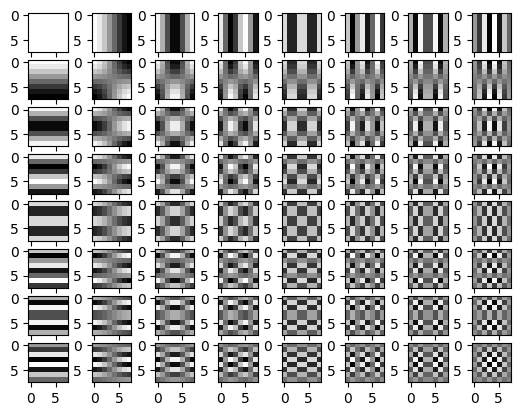

In [5]:
#Unnormalized 2D DCT basis 
M = 8
N = 8
fig,ax = plt.subplots(M,N)

for k in range(M):
    for l in range(N):
        A = np.zeros((M,N))
        for n in range(N):
            for m in range(M):
                A[n,m] = np.cos((m+0.5)*k*np.pi/M)*np.cos((n+0.5)*l*np.pi/N)

        
        
        ax[l,k].imshow(A,vmin=-1,vmax=1,cmap="gray")
        

The above image shows the 64 basis functions for the 2D DCT. White squares represent high values (1), while black grid shows low values (-1). We can see that we have a DC component at $k=0, l=0$. And as we progressively move to the higher indices, we get a more oscillatory behaviour as shown by the 'checkerboard' characteristics. These basis functions can be thought of as "filters". When we apply these filters on an 8x8 pixel image (element wise product of filter grid values and image pixels), we obtain a value which tells us how well the image matches the filter. The higher the value the better the match. So each filter is acts as a checker for a particular frequency component. For example for $k=0, l=0$, it checks for DC components. For $k=7, l=7$, it checks for high frequency components along both xy axis of an image. So with the 64 filters, we can obtain 64 coefficients that encodes the frequency content of an image (DC content + high frequency content). 

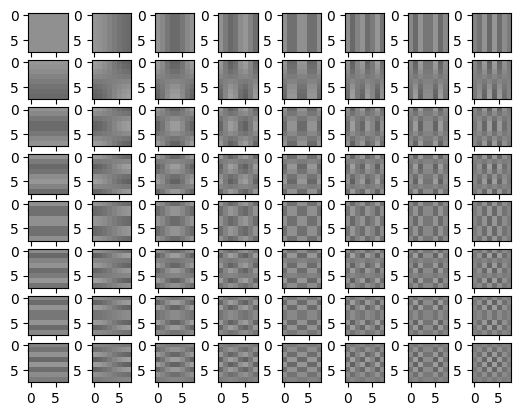

In [6]:
# Normalised DCT-2 basis 
M = 8
N = 8
alpha_k = 1/np.sqrt(M)
alpha_l = 1/np.sqrt(N)
z = np.ndarray((N,M,M,N))
fig,ax =plt.subplots(M,N)
for k in range(M):
    if k == 0:
        alpha_k = 1/np.sqrt(M)
    else:
        alpha_k=np.sqrt(2/M)
    for l in range(N):
        if l == 0:
            alpha_l = 1/np.sqrt(N)
        else:
            alpha_l=np.sqrt(2/N)
        for n in range(N):
            for m in range(M):
                z[l,k,n,m] = alpha_k*alpha_l*np.cos((m+0.5)*k*np.pi/M)*np.cos((n+0.5)*l*np.pi/N)



for k in range(M):
    for l in range(N):
       ax[l,k].imshow(z[l,k],vmin=-1,vmax=1,cmap="gray") 


For our example image, we import an 24 pixel (8x8) image depicting a cropped out "Hi".

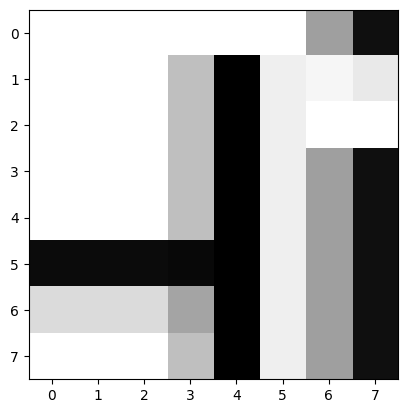

In [7]:
from PIL import Image
im = Image.open("./Hi.png")

plt.figure()
plt.imshow(im,cmap='gray');

In [8]:
im = np.array(im,np.float32)
im = im-128  #normalise image between -128,127
im[:,:,0]

array([[ 127.,  127.,  127.,  127.,  127.,  127.,   31., -113.],
       [ 127.,  127.,  127.,   63., -128.,  111.,  118.,  105.],
       [ 127.,  127.,  127.,   63., -128.,  111.,  127.,  127.],
       [ 127.,  127.,  127.,   63., -128.,  111.,   31., -113.],
       [ 127.,  127.,  127.,   63., -128.,  111.,   31., -113.],
       [-117., -117., -117., -120., -128.,  111.,   31., -113.],
       [  91.,   91.,   91.,   36., -128.,  111.,   31., -113.],
       [ 127.,  127.,  127.,   63., -128.,  111.,   31., -113.]],
      dtype=float32)

In [9]:
# Computes the DCT coefficient of our image
coef = np.zeros((M,N))
for k in range(M):
    for l in range(N):
        coef[k,l]=(np.sum(z[k,l,:,:]*(im[:,:,0])))

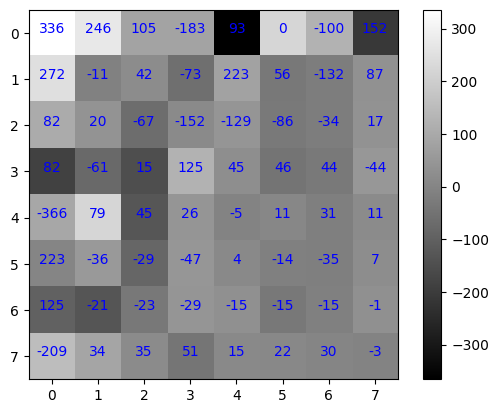

In [10]:
#Shows the X[k,l] values in a heatmap
plt.imshow(coef,cmap='gray')
for i in range(M):
    for j in range(N):
        plt.text(i,j,round(coef[i,j]),ha='center',color='b')
plt.colorbar();

From the heatmap above, we can see the $X[k,l]$ coefficients has bigger values close to the left corner (DC component) and low values towards the right bottom corner (high frequencies). This suggests the possibility of discarding the high frequency coefficients as they do not contribute much to the image content. This is one of the key technique used by jpeg to compress an image. 

In [11]:
# Create a mask to discard high frequency coefficients
mask = np.ones((M,N))
mask[7,1:] = 0
mask[1:,7] = 0
mask[6,2:] = 0
mask[2:,6] = 0
mask[3:,5] = 0
mask[5,3:] = 0
mask[4,4] = 0
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
#Coefficients with discarded HF components
coef *= mask
coef

array([[ 3.35750000e+02,  2.72133125e+02,  8.24893604e+01,
         8.16600159e+01, -3.66000000e+02,  2.23063125e+02,
         1.24672844e+02, -2.09283113e+02],
       [ 2.45618501e+02, -1.05598077e+01,  2.04766256e+01,
        -6.08869548e+01,  7.86178223e+01, -3.63065725e+01,
        -2.12786867e+01,  0.00000000e+00],
       [ 1.05381809e+02,  4.21509482e+01, -6.71629509e+01,
         1.45704775e+01,  4.50888540e+01, -2.92465791e+01,
        -0.00000000e+00,  0.00000000e+00],
       [-1.82833031e+02, -7.31791751e+01, -1.51581377e+02,
         1.24540070e+02,  2.59382845e+01, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00],
       [ 9.30000000e+01,  2.22591421e+02, -1.28929755e+02,
         4.48685073e+01, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00],
       [-2.42449675e-01,  5.61061003e+01, -8.60158289e+01,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00],
       [-9.96643709e+01, -1.319112

To retrieve our "compressed" image, we can use the 2D inverse DCT to recover our image.

2D Inverse DCT-2:$$ x[m,n] = \alpha_{m} \alpha_{n} \sum_{k=0}^{M-1}\sum_{l=0}^{N-1} X[l,k] cos[(m+\frac{1}{2})k \frac{\pi}{M}]cos[(n+\frac{1}{2})l \frac{\pi}{N}],$$ 
$$\alpha_{m}=\begin{dcases}
\frac{1}{\sqrt{M}} &m = 0\\
\sqrt{\frac{2}{M}} &\ 1 \le m \le M-1 
\end{dcases}$$

$$\alpha_{n}=\begin{dcases}
\frac{1}{\sqrt{N}} &n = 0\\
\sqrt{\frac{2}{N}} &\ 1 \le n \le N-1
\end{dcases}$$ 

$where \ m, \ k \ goes \ from \ 0...M-1, and \ n,l \ goes \ from \ 0...N-1$

In [13]:
# Apply IDCT to coefficients with discarded HF componets
reconstruct_im = np.zeros((M,N))
for m in range(M):
    for n in range(N):
        reconstruct_im[m,n]=(np.sum((z[:,:,m,n])*(coef)))


reconstruct_im

array([[ 122.6980921 ,  118.68978939,  124.58647748,  165.26130005,
          64.82978508,  165.95478715,   14.54010862,  -96.56033987],
       [ 145.01047928,  141.19677845,  107.88239433,   56.14178073,
         -88.88324065,  102.50017197,  101.57548803,   84.57614787],
       [  99.27273057,  128.80002458,  123.96345088,   43.44741774,
        -126.06629773,  111.76614905,  158.27523522,  141.54128968],
       [ 134.72707938,  151.13655061,  152.26180623,   67.23799298,
        -124.16562548,   69.91101625,   10.99082578, -117.09964575],
       [ 121.35073062,   99.53194772,   94.95551063,   45.93486125,
         -89.6876851 ,  138.09483154,   53.02893798, -118.20913464],
       [ -94.70841412, -111.05653725,  -88.95946008,  -97.89633014,
        -182.53385634,   90.58188937,   32.53116015, -117.9584516 ],
       [  75.40114922,   72.76756062,   87.39819972,   33.49977276,
        -104.66408934,  122.09092416,   36.1865708 , -112.68008794],
       [ 132.24815295,  134.93388587,  13

In [14]:
reconstruct_im += 128 #add back 128

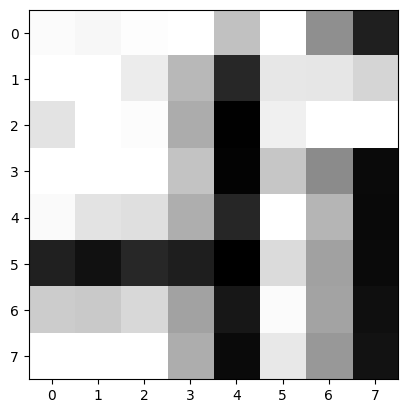

In [15]:
#Plot showing reconstructed image
plt.figure()
plt.imshow(reconstruct_im, vmin=0, vmax=255, cmap='gray');

The image above shows our reconstructed image, which has degraded quality compared to original image (due to discarded high frequency coefficients), however majority of the image content (cropped out word "Hi") has been retained. 

## References
1. https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/node231.html
2. Discrete-Time Signal Processing Third Edition Alan V. Oppenheim Ronald W. Schafer 